# Travail personnel 1 : Kepler et RK4
#### Cordier Alix & Vandepopeliere Romain - BA3 PHYS

## Mise en situation
Les première étapes consisteront à importer les librairies requises et ensuite d'implémenter les valeurs des constantes et des conditions initiales. Pour ces dernières nous avons choisi de placer le centre de la terre en $(0,0)$ du plan $xy$, d'imaginer le périhélie vers les $x$ négatifs et de choisir la vitesse initiale dirigée vers les $y$ positifs comme sur le schéma de l'énoncé.

<img src="figs/ellipse.png" alt="Drawing" style="width: 400px;"/>

In [32]:
from math import sin,cos
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib  import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [77]:
##Valeurs des constantes
G=6.67403*10**-11   #m^3.kg^-1.s^-2  
mT=5.972*10**24     #kg              ##masse de la Terre
mL=7.348*10**22     #kg              ##masse de la Lune

##Conditions initiales
x0=-362600000.0     #m
y0=0.0              #m
vx0=0.0             #m.s^-1
vy0=1083.4          #m.s^-1

En plaçant le centre de la Terre en $(0,0)$ et celui de la Lune en $(x,y)$, on obtient le système d'équations : 
$$ \frac{d^2x}{dt^2} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} x   $$
$$ \frac{d^2y}{dt^2} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} y   $$
puisque la Terre est fixe dans son référentiel.
Afin d'avoir des équations du premier ordre, il est judicieux d'introduire les vitesses : 
$$\frac{dx}{dt} = v_x $$
$$\frac{dy}{dt} = v_y $$
$$ \frac{dv_x}{dt} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} x   $$
$$ \frac{dv_y}{dt} = - \frac{Gm_T}{(x^2+y^2)^{3/2}} y   $$

Il est ensuite intéressant de créer un vecteur $\vec{u}(t)$ tel que $$\vec{u}(t) = \begin{pmatrix} x\\y\\v_x\\v_y \end{pmatrix}. $$
En vue du système des 4 équations précédentes, le vecteur dérivé $\vec{u}'(t)$ sera comme suit : $$\vec{u}'(t) = \begin{pmatrix} v_x\\v_y\\- \frac{Gm_T}{(x^2+y^2)^{3/2}} x   \\ - \frac{Gm_T}{(x^2+y^2)^{3/2}} y\end{pmatrix}. $$

## Question 1

Avant de commencer, implémentons la méthode Runge-Kutta 4. 

In [3]:
def rk4_step(u,f,dt):
    k1=f(u)
    k2=f(u+dt*k1/2)
    k3=f(u+dt*k2/2)
    k4=f(u+dt*k3)
    return u+(k1+2*k2+2*k3+k4)*dt/6

Ensuite, il est intéressant d'implémenter la fonction $$f(\vec{u})=\vec{u}'$$.

In [78]:
def f(u):
    x=u[0]
    y=u[1]
    vx=u[2]
    vy=u[3]
    r3=(x**2+y**2)**(3/2)                 #Calcul du coefficient quotient avant pour éviter de le faire N fois de trop
    c=-G*mT/r3
    return numpy.array([vx,vy,c*x,c*y])

Sachant que le période de révolution dans la lune est un peu inférieure à 30 jours, on choisit une période de 30 jours pour être sûrs qu'il y a aura au moins une révolution entière.

In [76]:
dt=1            #seconde
T=86400*30      #30 jours
N=int(T/dt)+1   #nombre de time steps

In [185]:
u=numpy.empty((N,4))
u[0]=numpy.array([x0,y0,vx0,vy0])  #en t=0, il s'agit des conditions initiales

In [13]:
for t in range(N-1):               #exécution de la résolution par RK4, la méthode lourde au niveau calculatoire 
    u[t+1]=rk4_step(u[t],f,dt)     #et le nombre conséquent d'itérations font que cela prend un petit temps.

In [14]:
x_traj=u[:,0]
y_traj=u[:,1]

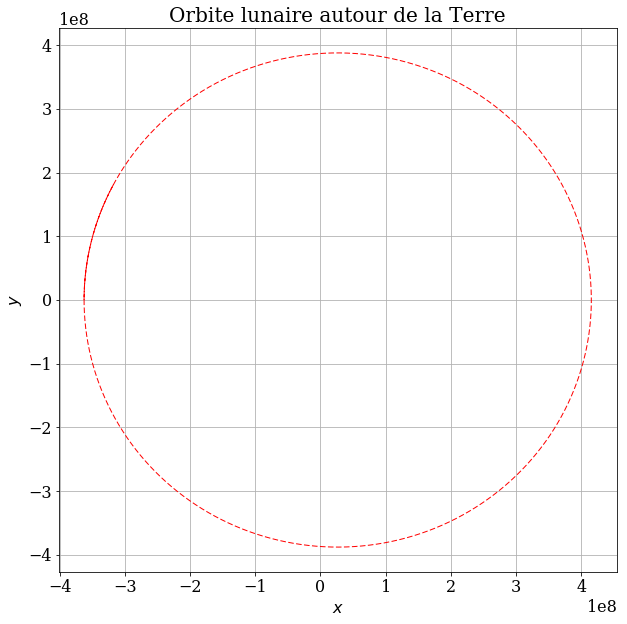

In [186]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbite lunaire autour de la Terre',fontsize=20)
pyplot.plot (x_traj,y_traj, 'r--',lw=1)

##### Remarques
1) Comme le T est choisi est supérieur à la période, il est normal de voir une superposition de trajectoires après une révolution entière.

2) Le calcul d'excentricité et la vérification de la bonne nature de l'ellipse seront effectués après la question 2.

## Question 2

Nous allons maintenant cherhcer les valeurs du demi-grand axe et du demi-petit axe.
Pour ce faire, on va calculer la distance qui sépare $x_{min}$ de $x_{max}$ (=grand axe) et ensuite celle qui sépare $y_{min}$ de $y_{max}$ (=petit axe).

Comme l'ellipse est centrée verticalement, commençons par les endroits de la trajectoires qui coupent l'axe y pour trouver  $x_{min}$ et $x_{max}$. Pour cela, on va affiner un intervalle de distance autour de $y=0$ jusqu'à ce qu'on n'ait plus que 3 indices, à savoir les 3 intersections que l'on voit sur le graphique (on estime qu'un intervalle de l'ordre de la centaine de mètres est correct par rapport à la longueur des axes de l'ellipse qui seront de l'ordre de la centaine de milliers de kilomètres). Prenons donc les 2 premières intersections.

In [84]:
idx_extr=numpy.where(abs(y_traj)<=500.0)[0]
print(idx_extr)

[      0 1207222 2414443]


In [149]:
xmin=x_traj[idx_extr[0]]
xmax=x_traj[idx_extr[1]]
print(xmin)
print(xmax)

-362600000.0
415360225.55


In [91]:
a=abs(xmin-xmax)/2     #demi-grand axe
print(a)

388980112.775


Pour le demi-petit axe, c'est plus compliqué car l'ellipse n'est pas centrée horizontalement. On va donc calculer les coordonées du centre de l'ellipse (on peut le faire maintenant qu'on connait $x_{min}$ et $x_{max}$) pour ensuite décaler toute l'ellipse afin de ramener son centre en $(0,0)$ et ainsi pouvoir étudier le petit axe comme on l'a fait pour le grand.  Cette fois, en vue du graphique, on s'attend à trouver les indices de 2 intersections : $y_{min}$ et $y_{max}$.

In [150]:
centre=(xmax+xmin)/2
print(centre)

26380112.7749


In [156]:
x_traj_centree=x_traj-centre   #décalage de l'ellipse vers la droite

In [157]:
idy_extr=numpy.where(abs(x_traj_centree)<=400)[0]
print(idy_extr)

[ 577550 1836893]


In [158]:
ymin=y_traj[idy_extr[0]]
ymax=y_traj[idy_extr[1]]

In [159]:
b=abs(ymin-ymax)/2     #demi-petit axe
print(b)

388084549.788


Ainsi, on obtient finalement les résultats pour $a$ le demi-grand axe et $b$ le demi-petit axe : 
$$a = 3,88980112.10^8m$$
$$b = 3,88084549.10^8m$$

#### Calcul d'excentricité
En connaissant les axes de l'ellipse, l'excentricité $e$ est donnée par : $$e=\frac{\sqrt{a^2-b^2}}{a}$$

In [155]:
e=(a**2-b**2)**(1/2)/a
print(e)

0.0678186670918


On obtient donc une excentricité valant $$e=0.06782$$

#### Tracé théorique

Implémentons maintenant le tracé de l'ellipse théorique ayant pour équation : $$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$ 
avec pour excentricité $$\epsilon = 0.0549006$$.

In [163]:
epsilon=0.0549006
rmin=abs(x0)
two_pi=2*3.14159265358979
n=10000
theta=numpy.linspace(0.0,two_pi,n)
x_theo=numpy.empty(n)
y_theo=numpy.empty(n)

In [164]:
for i in range(n):
    x_theo[i]=rmin*(1+epsilon)*cos(theta[i])/(1+epsilon*cos(theta[i]))
    y_theo[i]=rmin*(1+epsilon)*sin(theta[i])/(1+epsilon*cos(theta[i]))

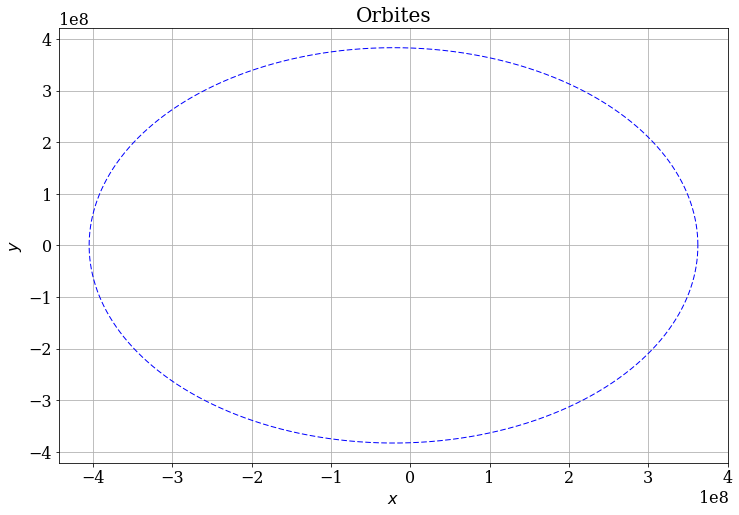

In [165]:
pyplot.figure(figsize=(12,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbites',fontsize=20)
pyplot.plot (x_theo,y_theo, 'b--',lw=1)

#### Comparaison des deux ellipses

Pour qu'une comparaison sur le même graphique ait un sens, il faut recentrer les deux ellipses. Le travail a déjà été réalisé pour l'ellipse "expérimentale"; il faut donc appliquer le même procédé pour la théorique (on remarque que, de nouveau, l'ellipse est déjà centrée verticalement).

In [179]:
idx_extr_th=numpy.where(abs(y_theo)<=210000.0)[0]     #l'intervalle est plus grand car il y a beaucoup moins de points 
print(idx_extr_th)                                    #qui constituent la trajectoire

[   0 4999 5000 9999]


In [180]:
xmin_th=x_theo[idx_extr_th[0]]
xmax_th=x_theo[idx_extr_th[1]]

In [181]:
centre_th=(xmax_th+xmin_th)/2
print(centre_th)

-21063337.435


In [182]:
x_theo_centree=x_theo-centre_th

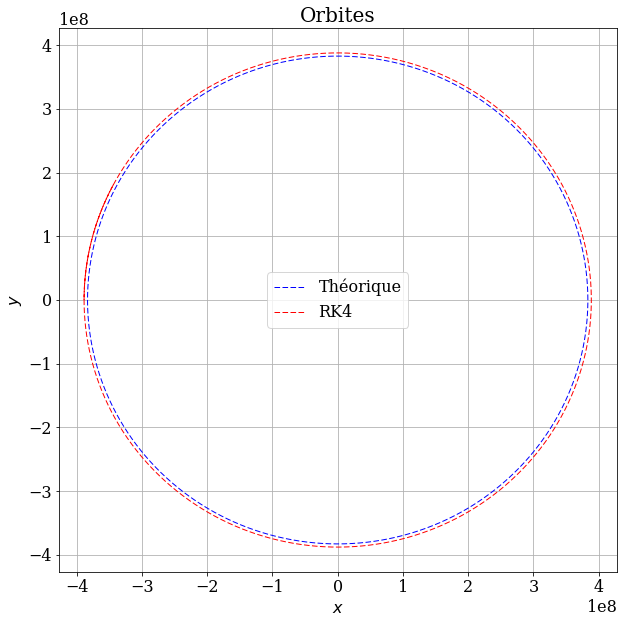

In [184]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbites',fontsize=20)
pyplot.plot (x_theo_centree,y_theo, 'b--',lw=1,label='Théorique')
pyplot.plot (x_traj_centree,y_traj, 'r--',lw=1,label='RK4')
pyplot.legend()

Les deux ellipses sont donc très semblables. Le petit décalage entre les deux est probablement uniquement un effet graphique ou alors est dû à de l'imprécision lors du procédé pour les recentrer.

## Question 3 

La réponse à cette question est directement donnée par ce qu'on a fait au début de la question 2. En effet, on a trouvé les indices des 3 intersections de la trajectoire avec l'axe $x$ et il suffit donc de comparer l'indice de la 1ère intersection avec celui de la 3ème. Vu les conditions initiales, il est logique que l'indice de la première intersection soit 0 et que la période soit donc donnée par l'indice de la 3ème intersection (le pas $dt$ valant 1 seconde, l'indice est donc direcement le nombre de secondes écoulées depuis l'instant 0).

In [95]:
periode=idx_extr[2]
periode_en_jours=periode/84600
print(periode_en_jours)

28.5395153664


La période $T$ est donc $$T=28,53951 j.$$